# Exercise

# 1. 在简单的神经网络模型中实验隐藏神经元的数量，以及学习率

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

torch.set_printoptions(edgeitems=2, threshold=50)

In [32]:
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

In [33]:
x = torch.tensor(x).unsqueeze(1)
y = torch.tensor(y).unsqueeze(1)

In [34]:
n_samples = x.shape[0]
n_val = int(0.2 * n_samples)

In [35]:
shuffled_indices = torch.randperm(n_samples)

In [36]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 5,  8,  2,  1,  6, 10,  3,  0,  4]), tensor([7, 9]))

In [37]:
train_x = x[train_indices]
train_y = y[train_indices]
val_x = x[val_indices]
val_y = y[val_indices]

train_x_scaled = 0.1 * train_x
val_x_scaled = 0.1 * val_x

In [38]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_x, val_x, train_y, val_y):
    for epoch in range(1, n_epochs + 1):
        train_y_pred = model(train_x)
        train_loss = loss_fn(train_y_pred, train_y)

        val_y_pred = model(val_x)
        val_loss = loss_fn(val_y_pred, val_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch == 1 or epoch % 500 == 0:
            print(
                f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}"
            )

Epoch 1, Training loss 224.6745, Validation loss 99.7085
Epoch 500, Training loss 17.5079, Validation loss 7.5681
Epoch 1000, Training loss 4.5732, Validation loss 3.9255
Epoch 1500, Training loss 5.5825, Validation loss 0.9091
Epoch 2000, Training loss 3.6970, Validation loss 0.8153
Epoch 2500, Training loss 2.6030, Validation loss 1.3821
Epoch 3000, Training loss 2.1823, Validation loss 1.8891
Epoch 3500, Training loss 2.0065, Validation loss 2.3084
Epoch 4000, Training loss 1.9218, Validation loss 2.6878
Epoch 4500, Training loss 1.8674, Validation loss 3.0669
Epoch 5000, Training loss 1.8210, Validation loss 3.4541


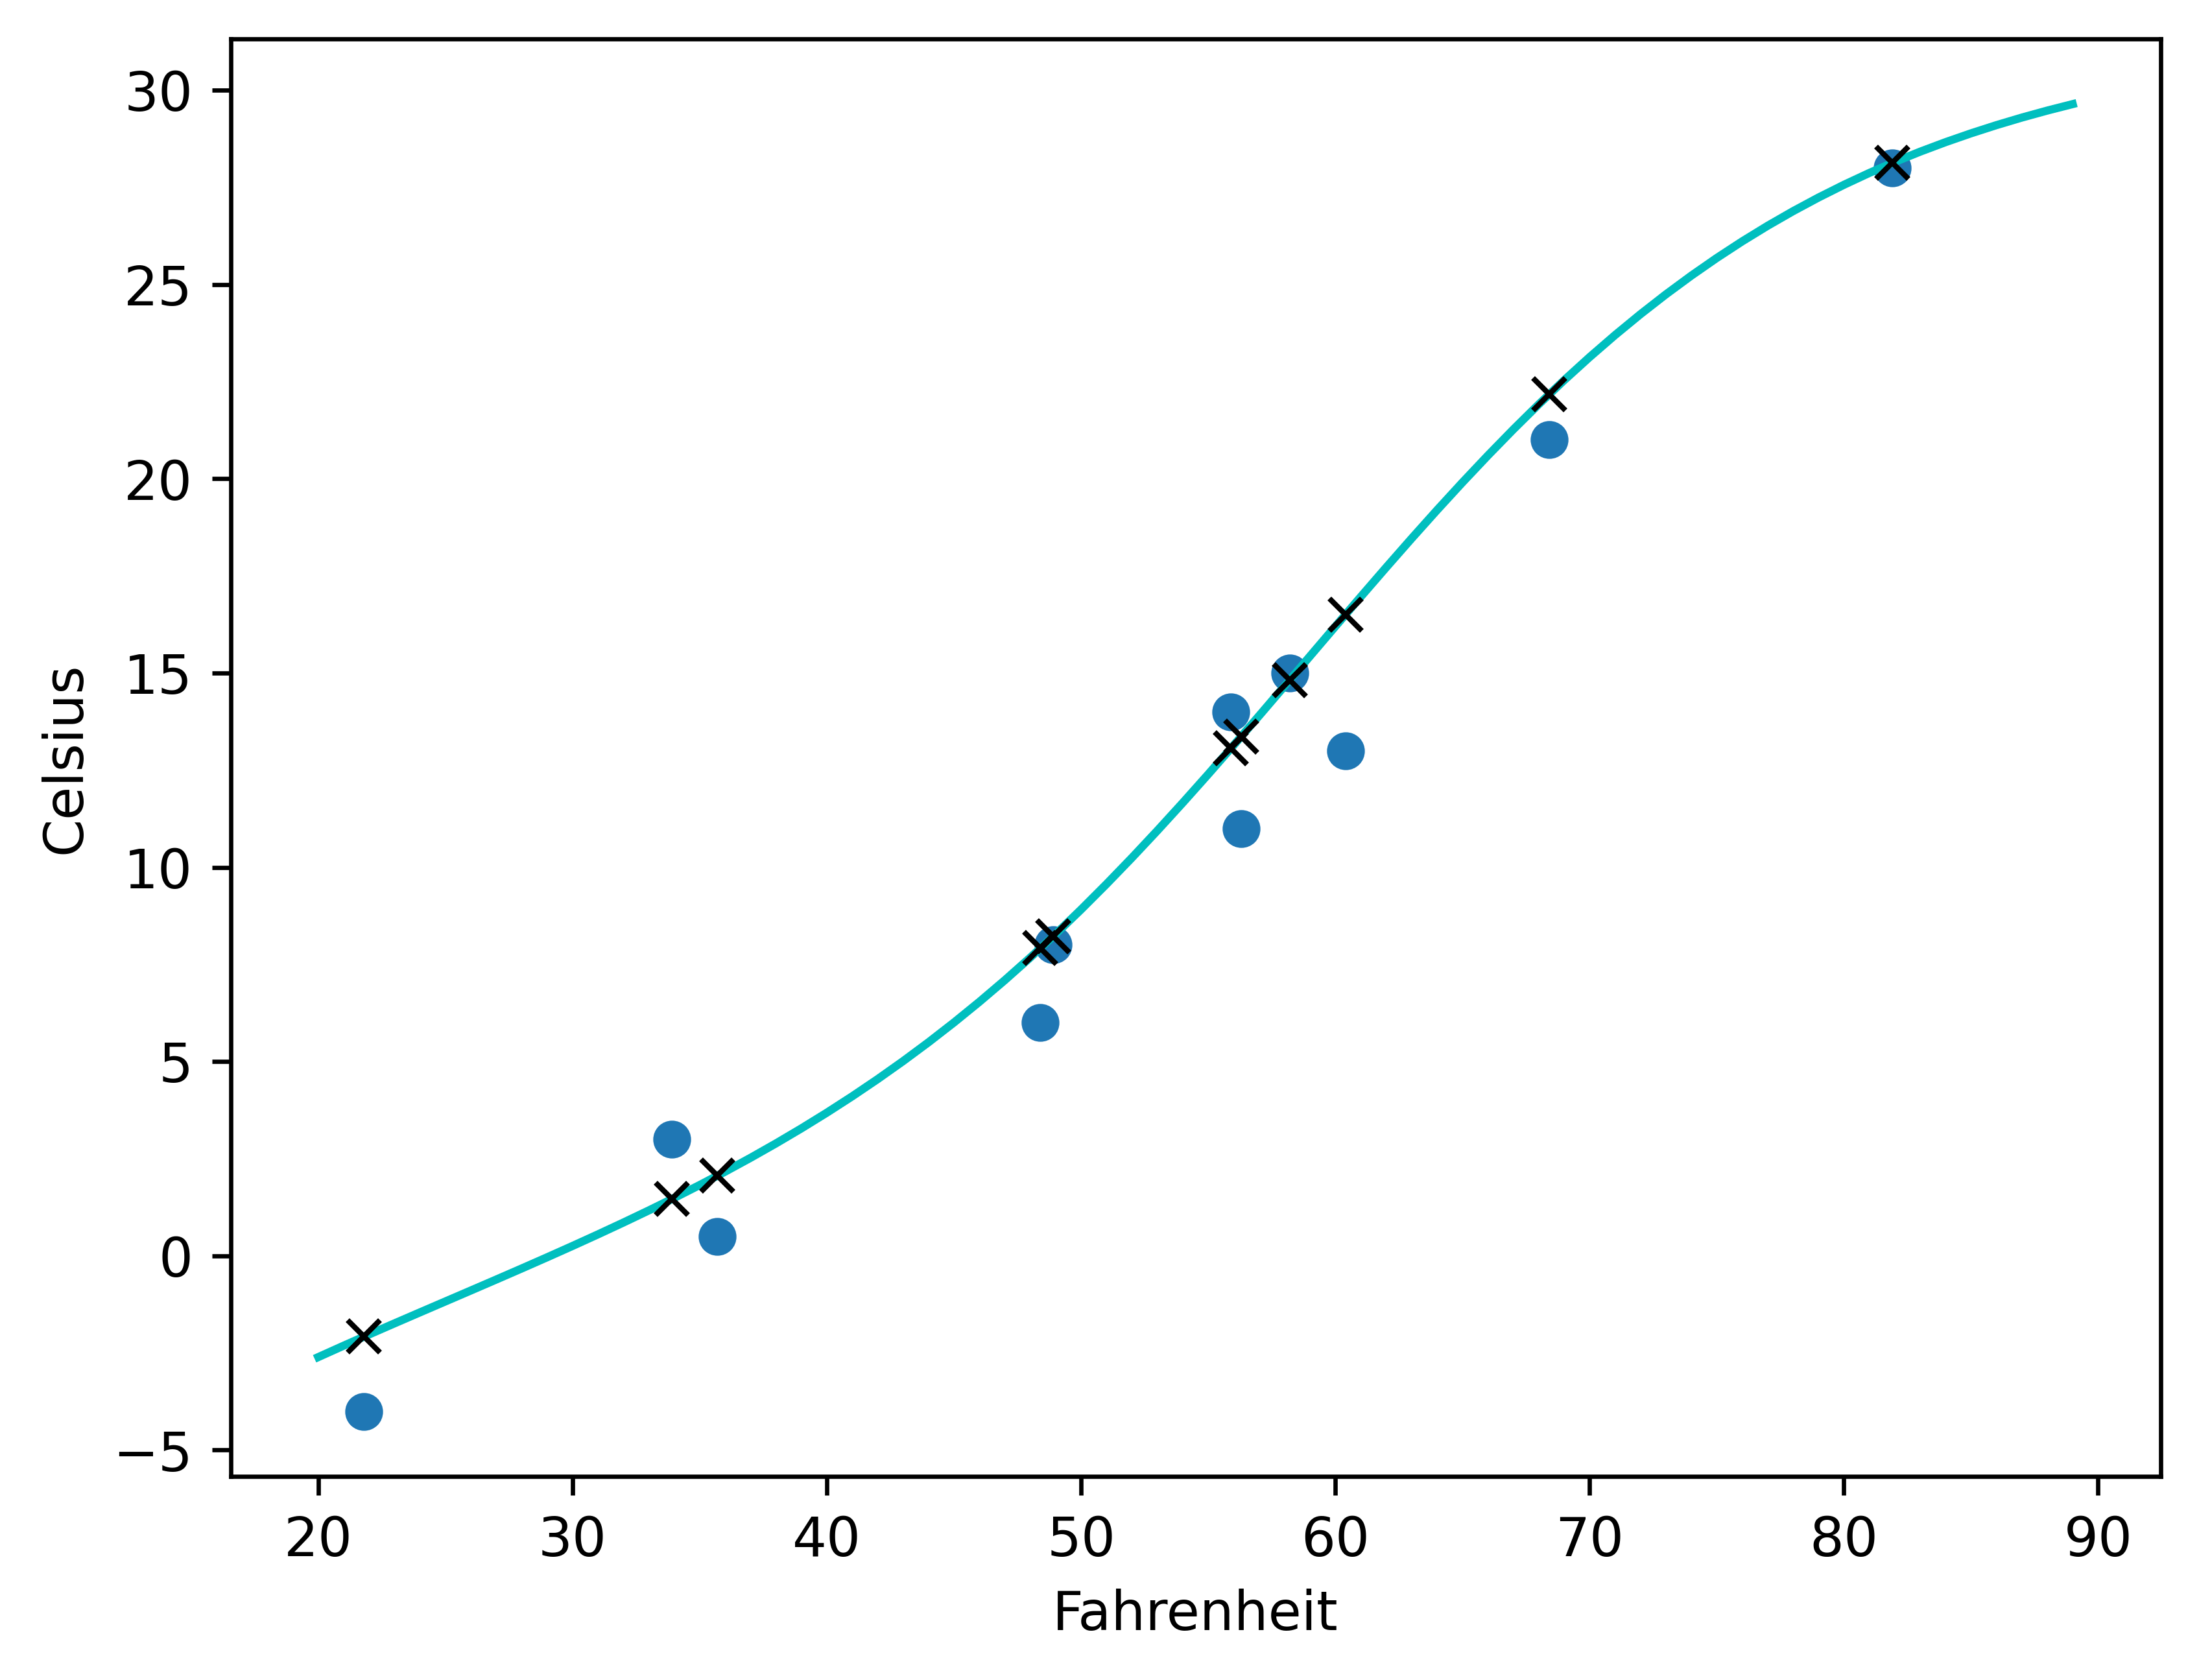

In [39]:
seq_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, 10)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(10, 1)),
        ]
    )
)

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    train_x=train_x_scaled,
    val_x=val_x_scaled,
    train_y=train_y,
    val_y=val_y,
)

t_range = torch.arange(20.0, 90.0).unsqueeze(1)
t_range, t_range.shape
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), y.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(x.numpy(), seq_model(0.1 * x).detach().numpy(), "kx")

Epoch 1, Training loss 227.0992, Validation loss 100.7949
Epoch 500, Training loss 6.9971, Validation loss 2.5952
Epoch 1000, Training loss 2.7227, Validation loss 5.1842
Epoch 1500, Training loss 2.3219, Validation loss 4.5203
Epoch 2000, Training loss 2.1675, Validation loss 3.9414
Epoch 2500, Training loss 3.8295, Validation loss 1.3025
Epoch 3000, Training loss 2.3262, Validation loss 2.1670
Epoch 3500, Training loss 2.2554, Validation loss 1.9892
Epoch 4000, Training loss 2.1605, Validation loss 1.9454
Epoch 4500, Training loss 2.0825, Validation loss 1.9451
Epoch 5000, Training loss 2.0170, Validation loss 1.9789


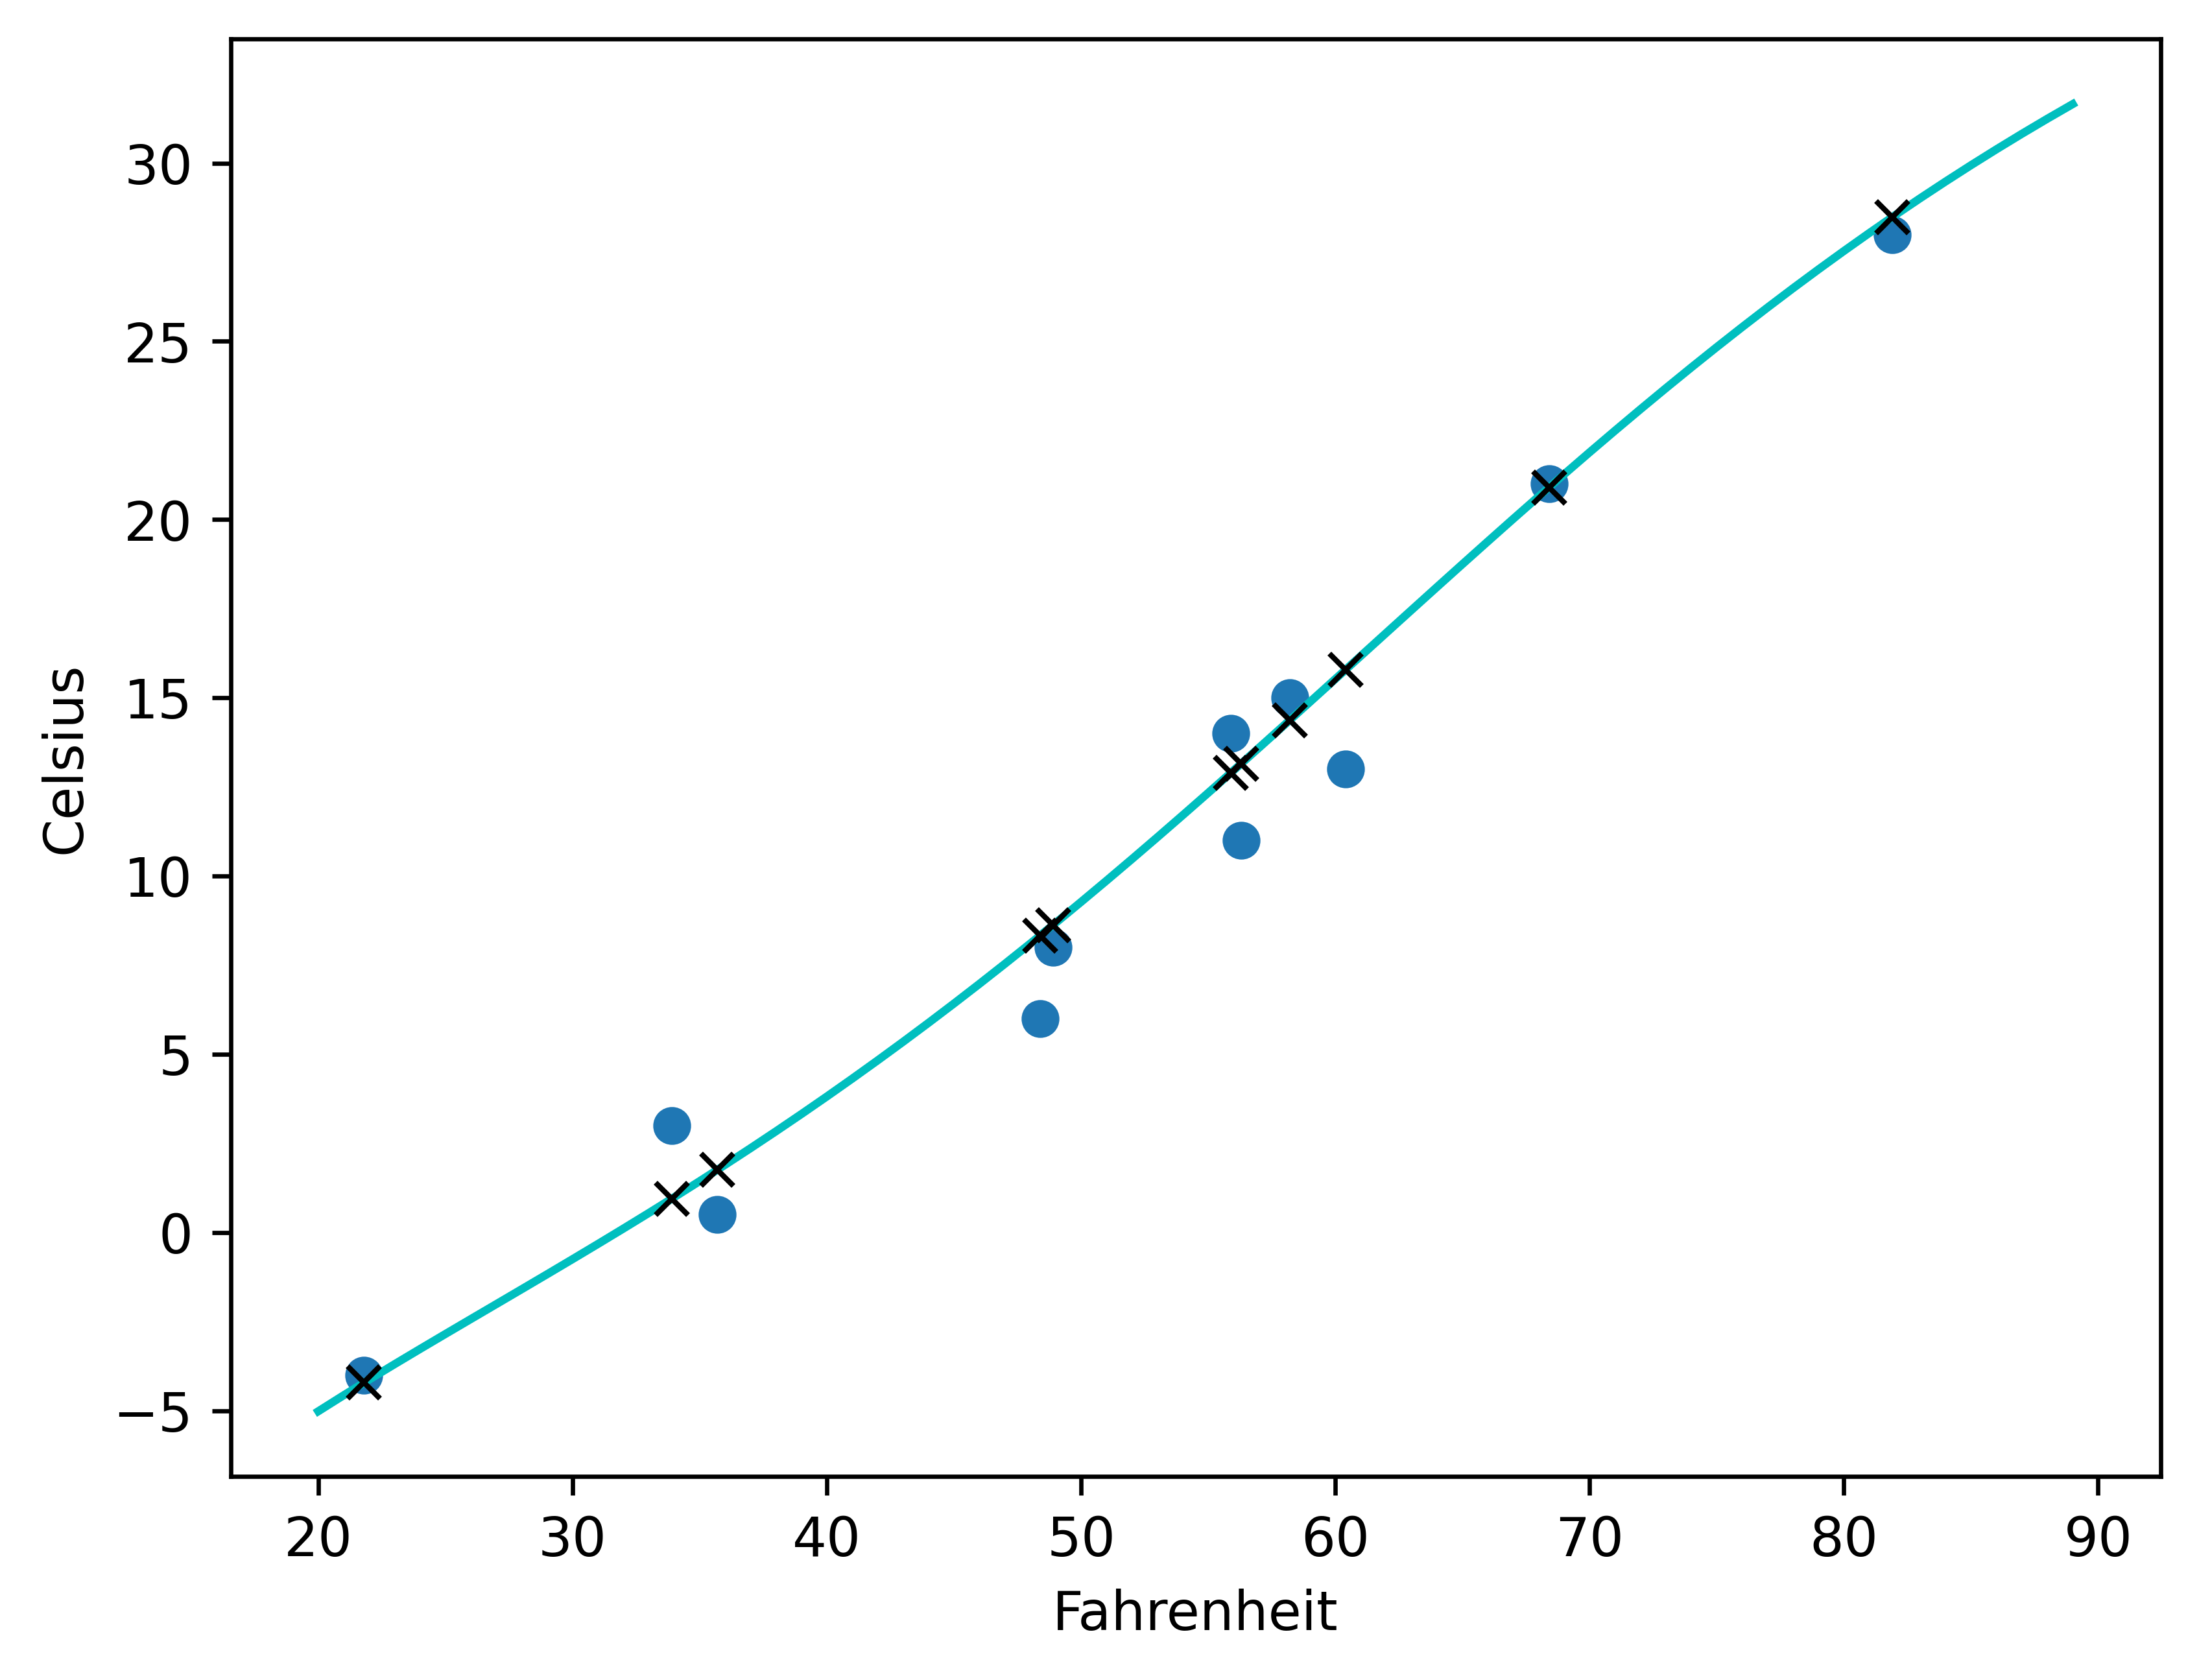

In [40]:
seq_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, 100)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(100, 1)),
        ]
    )
)

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    train_x=train_x_scaled,
    val_x=val_x_scaled,
    train_y=train_y,
    val_y=val_y,
)

t_range = torch.arange(20.0, 90.0).unsqueeze(1)
t_range, t_range.shape
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), y.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(x.numpy(), seq_model(0.1 * x).detach().numpy(), "kx")

Epoch 1, Training loss 218.1592, Validation loss 96.5947
Epoch 500, Training loss 3.3935, Validation loss 11.6053
Epoch 1000, Training loss 2.9933, Validation loss 7.8372
Epoch 1500, Training loss 5.4279, Validation loss 9.5835
Epoch 2000, Training loss 12.3315, Validation loss 17.6702
Epoch 2500, Training loss 9.4182, Validation loss 15.0625
Epoch 3000, Training loss 7.3106, Validation loss 13.2296
Epoch 3500, Training loss 6.2187, Validation loss 12.7173
Epoch 4000, Training loss 5.8459, Validation loss 13.4014
Epoch 4500, Training loss 5.5913, Validation loss 14.4100
Epoch 5000, Training loss 5.1684, Validation loss 15.1903


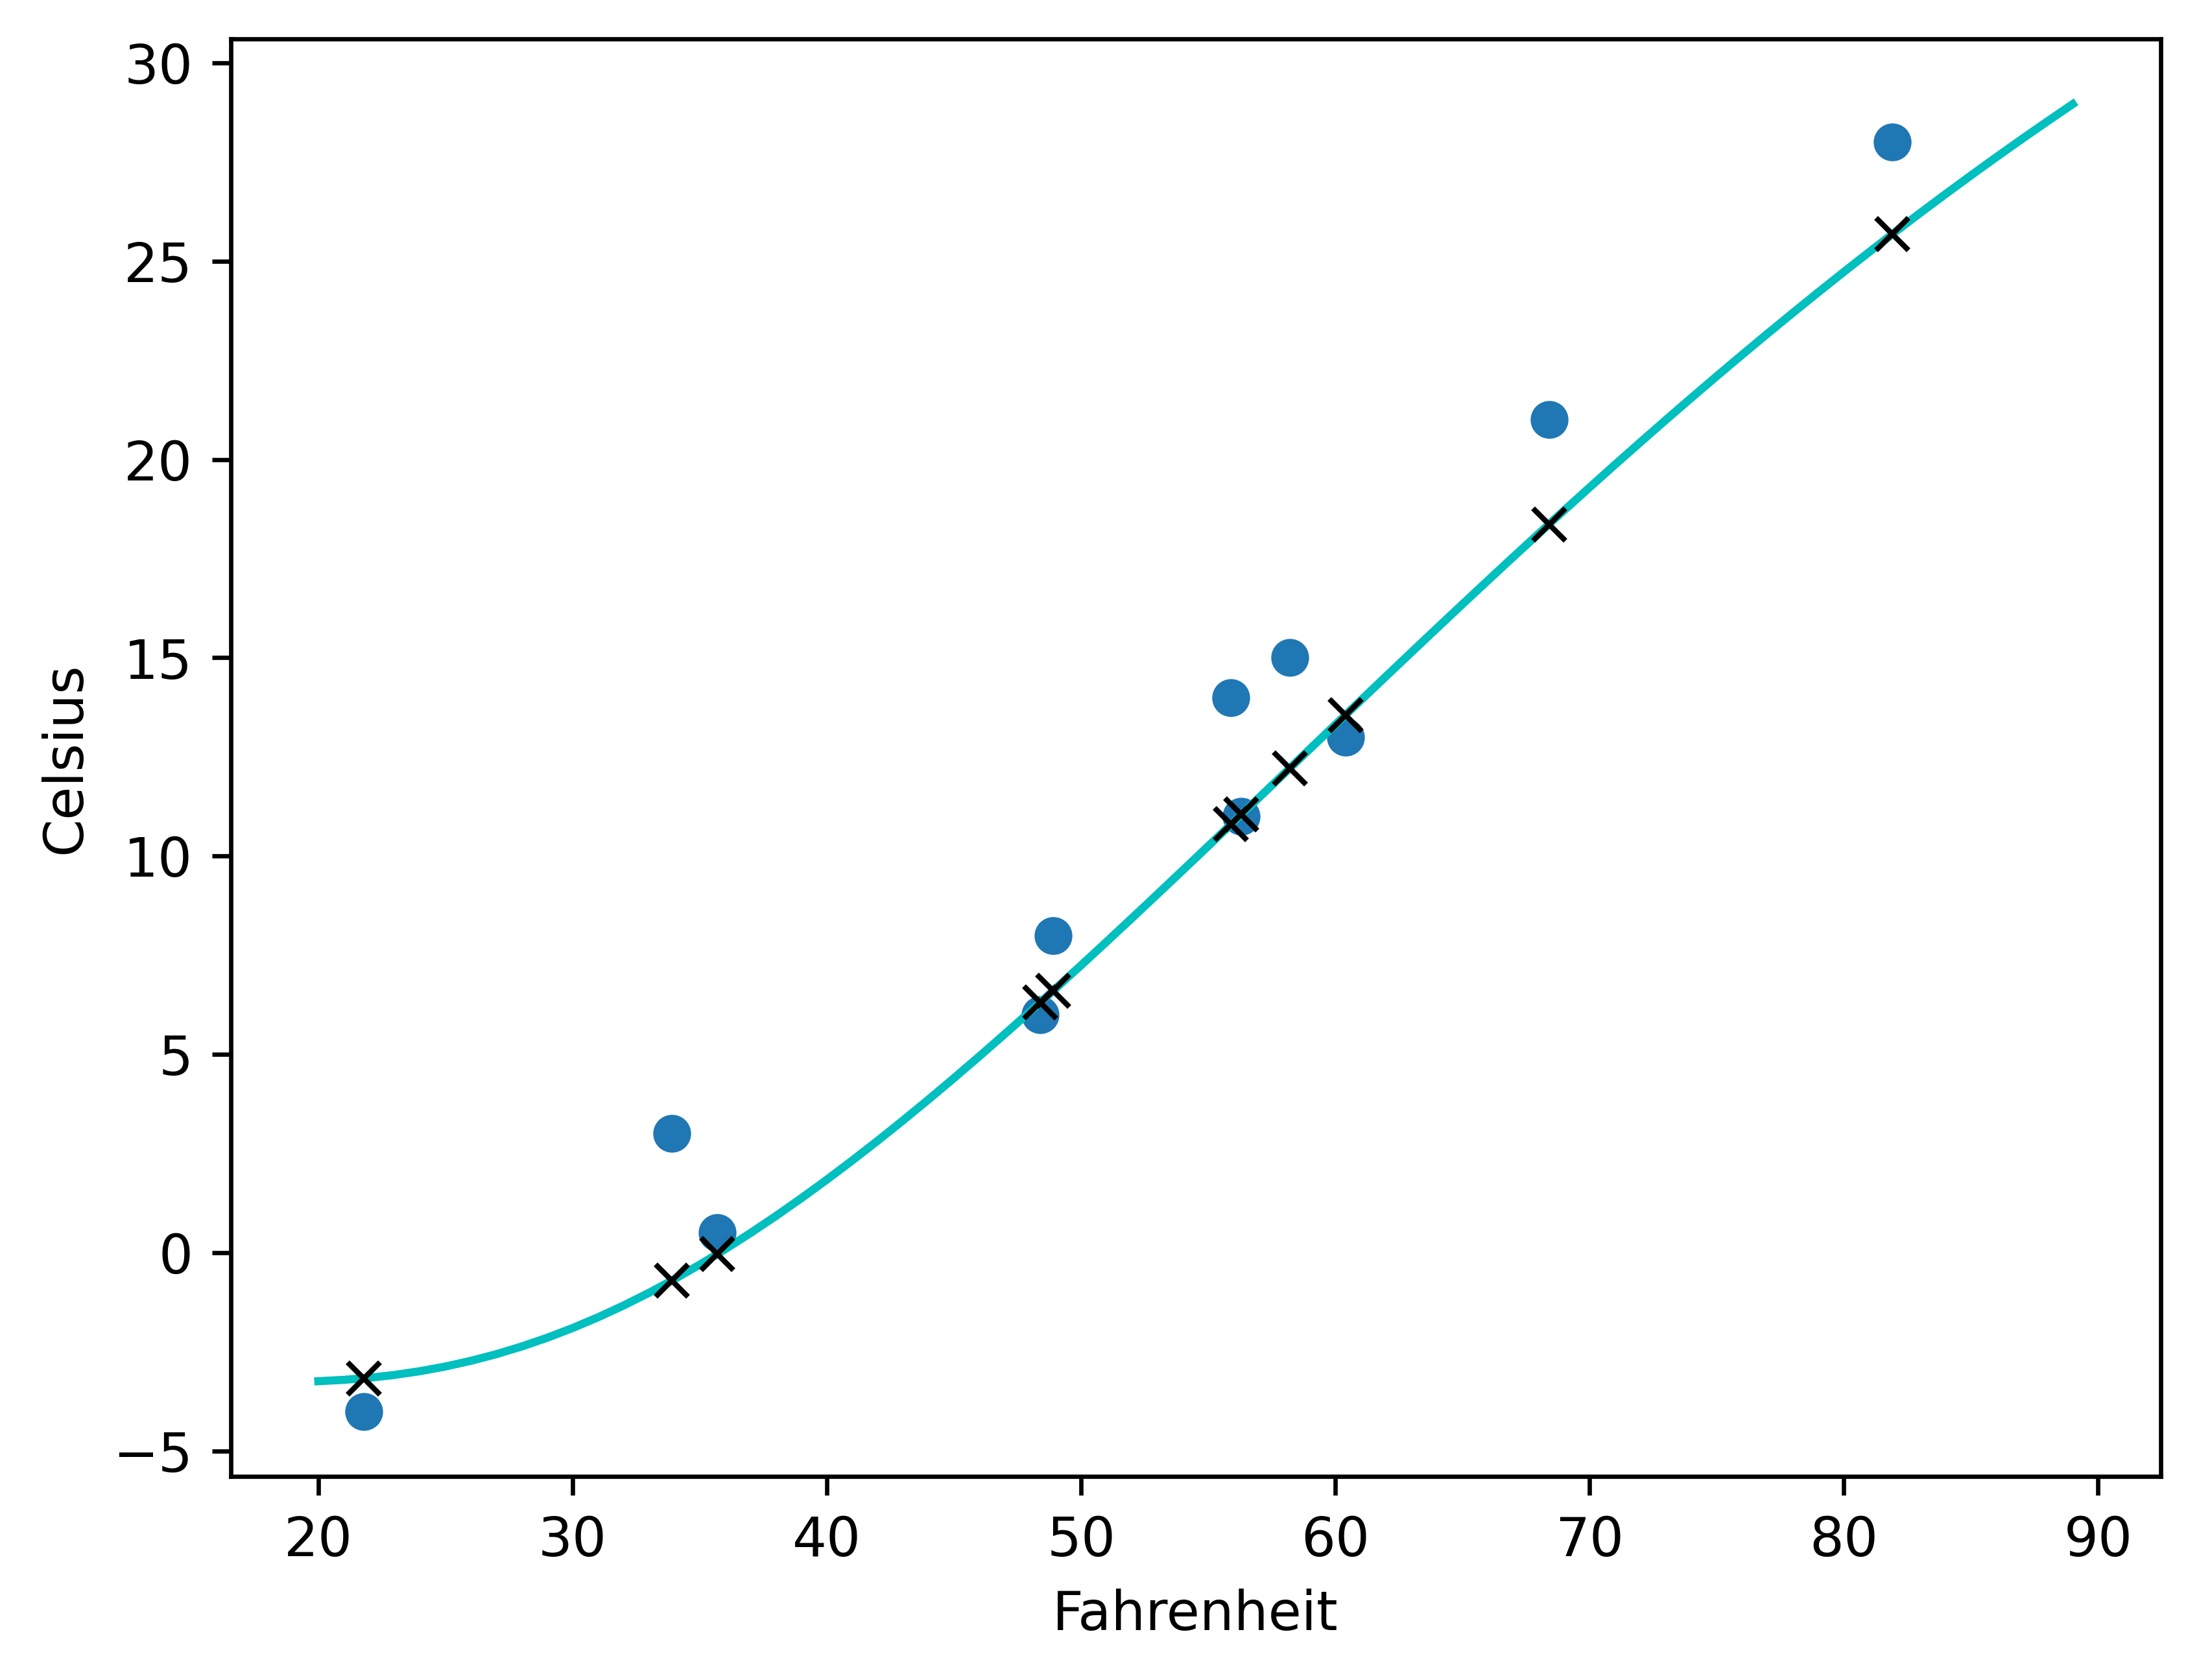

In [41]:
seq_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, 1000)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(1000, 1)),
        ]
    )
)

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    train_x=train_x_scaled,
    val_x=val_x_scaled,
    train_y=train_y,
    val_y=val_y,
)

t_range = torch.arange(20.0, 90.0).unsqueeze(1)
t_range, t_range.shape
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), y.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(x.numpy(), seq_model(0.1 * x).detach().numpy(), "kx")

Epoch 1, Training loss 207.7760, Validation loss 92.4857
Epoch 500, Training loss 3.4885, Validation loss 12.1720
Epoch 1000, Training loss 2.7969, Validation loss 7.2882
Epoch 1500, Training loss 2.5781, Validation loss 4.9807
Epoch 2000, Training loss 2.4172, Validation loss 4.0804
Epoch 2500, Training loss 6.2768, Validation loss 11.2429
Epoch 3000, Training loss 3.9492, Validation loss 8.4596
Epoch 3500, Training loss 3.6988, Validation loss 9.0200
Epoch 4000, Training loss 4.7143, Validation loss 12.3935
Epoch 4500, Training loss 3.6698, Validation loss 11.7549
Epoch 5000, Training loss 3.3060, Validation loss 12.4651
Epoch 5500, Training loss 3.1066, Validation loss 13.5934
Epoch 6000, Training loss 2.8752, Validation loss 14.6223
Epoch 6500, Training loss 2.6390, Validation loss 15.5835
Epoch 7000, Training loss 2.4235, Validation loss 16.5342
Epoch 7500, Training loss 2.2312, Validation loss 17.4752
Epoch 8000, Training loss 2.0538, Validation loss 18.3597
Epoch 8500, Training 

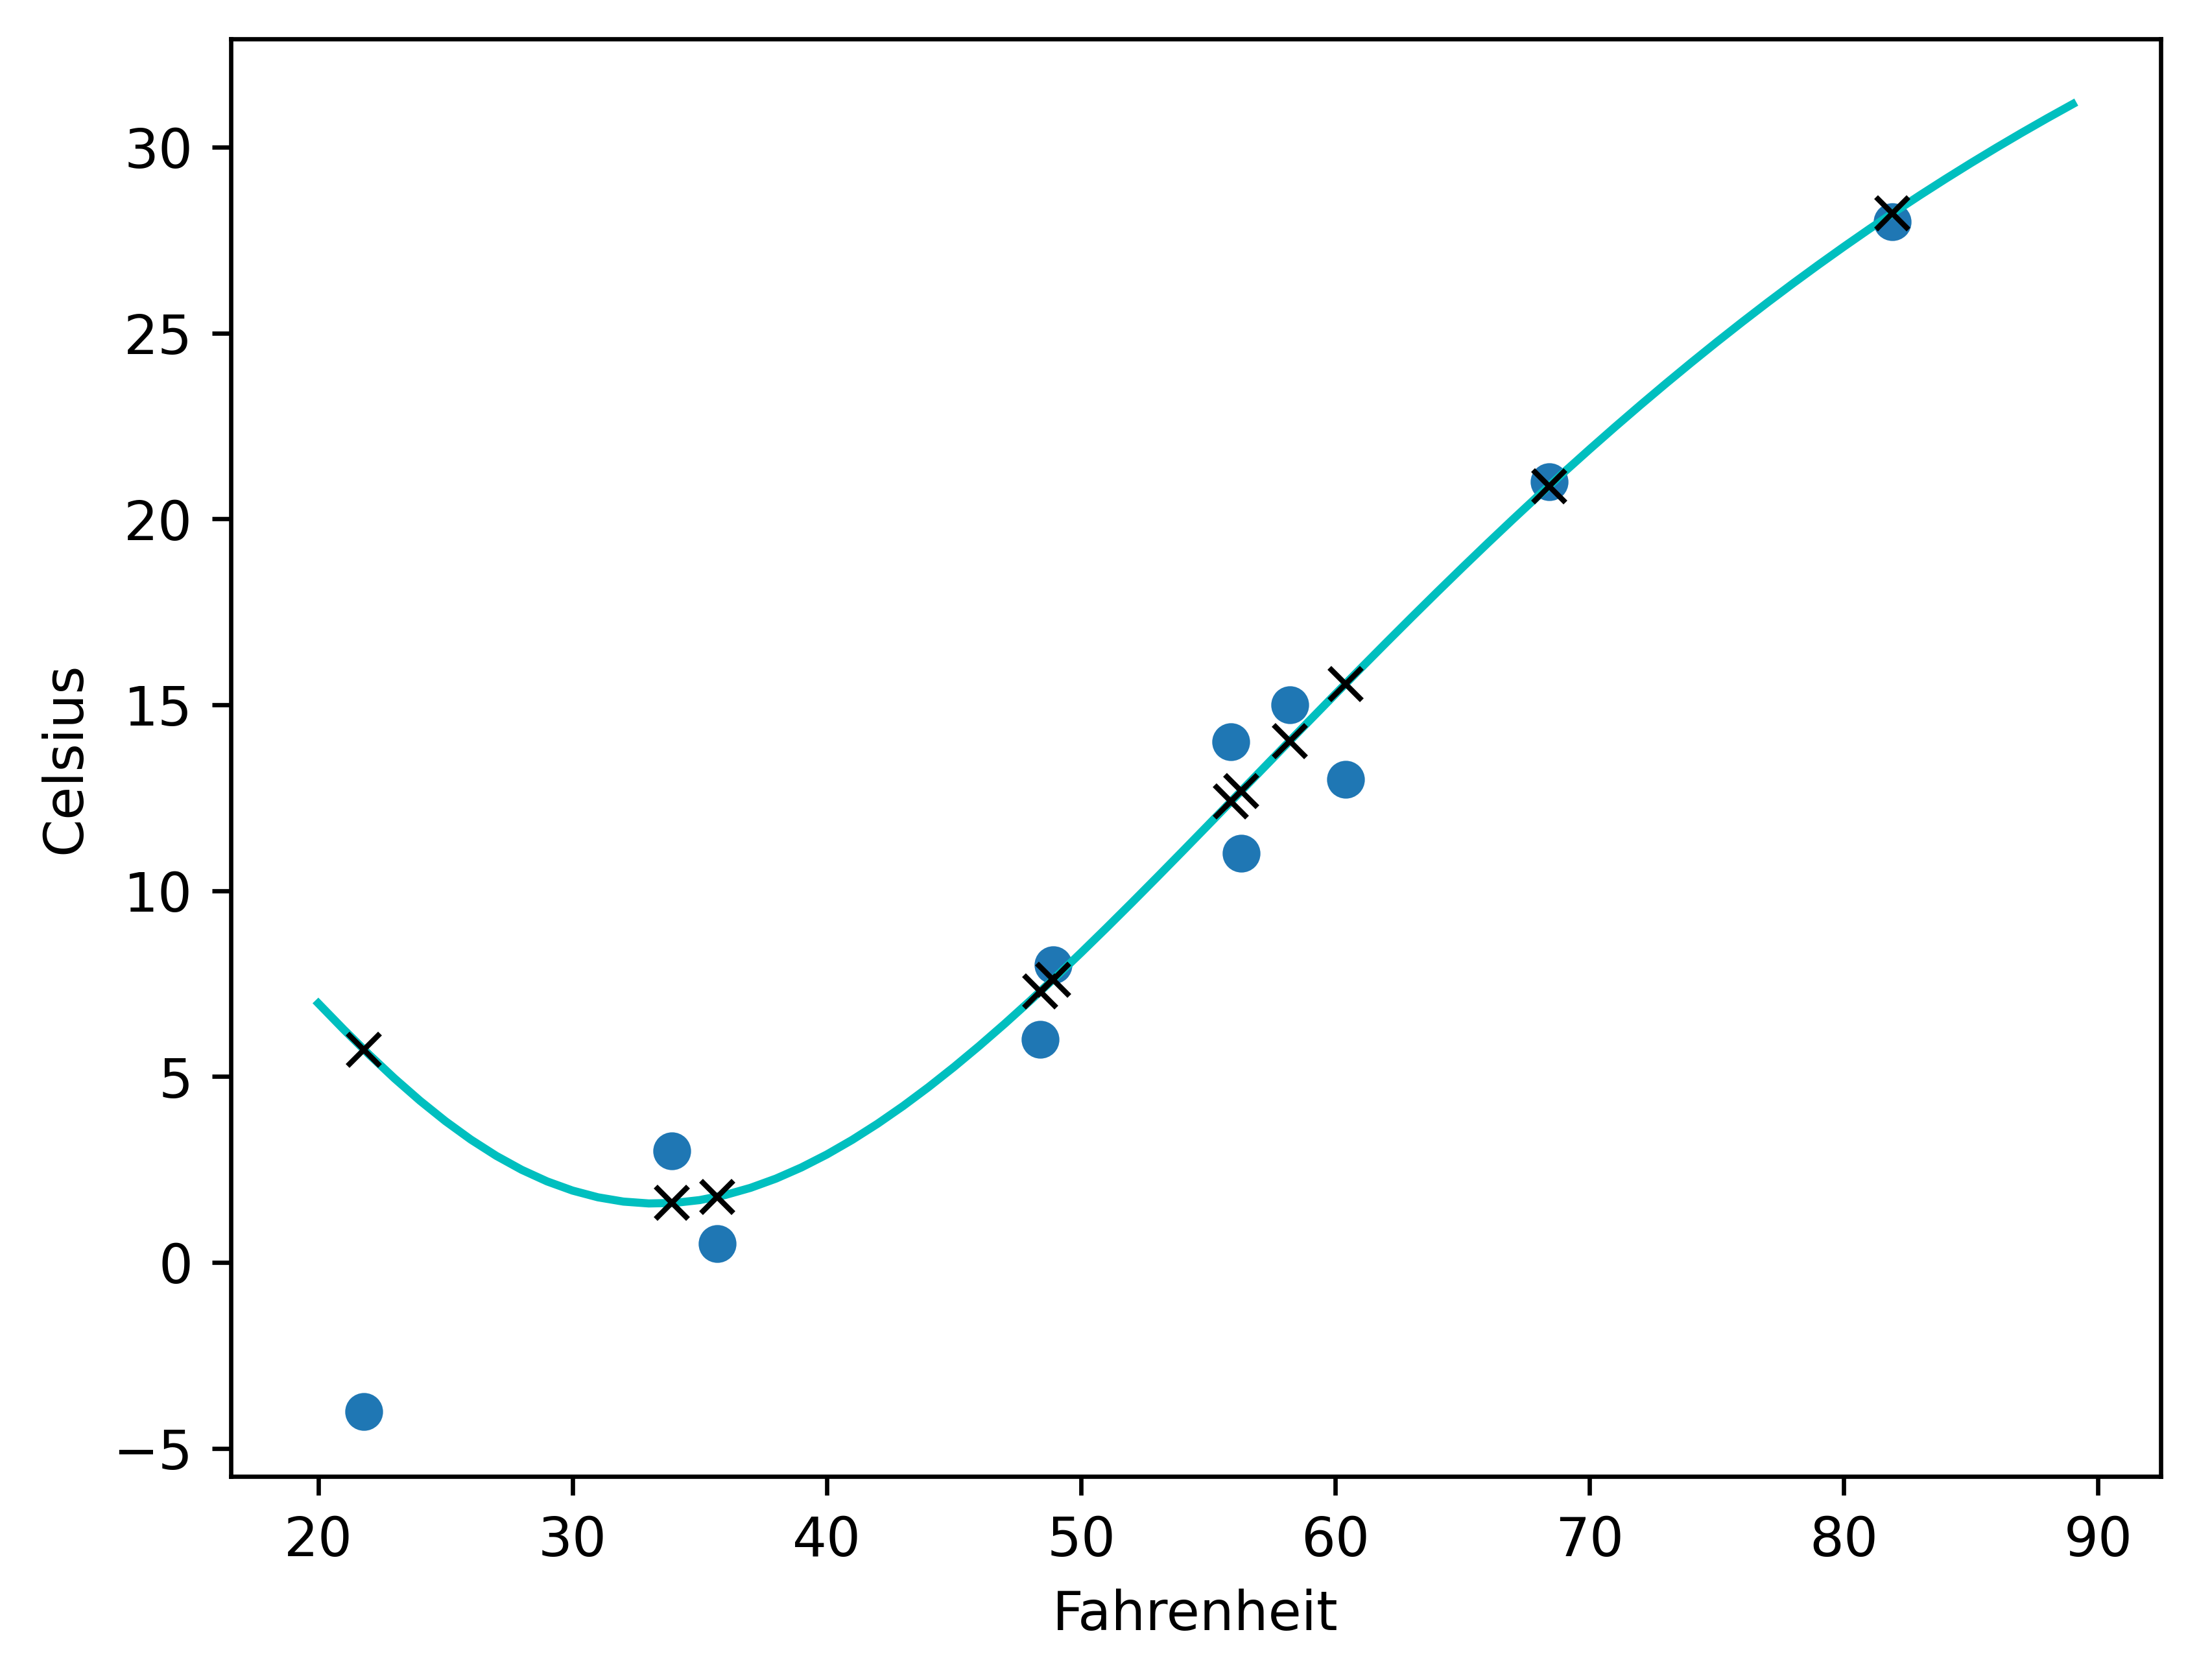

In [42]:
seq_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, 1000)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(1000, 1)),
        ]
    )
)

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=20000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    train_x=train_x_scaled,
    val_x=val_x_scaled,
    train_y=train_y,
    val_y=val_y,
)

t_range = torch.arange(20.0, 90.0).unsqueeze(1)
t_range, t_range.shape
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), y.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(x.numpy(), seq_model(0.1 * x).detach().numpy(), "kx")

## 1.a 
增加线性层的线性单元的数量会产生更多的线性输出
## 1.b
很明显，增加迭代次数会明显地过拟合训练集的数据
## 1.c
增加了线性神经元后，训练后的训练集loss增大了，但测试集上的loss反而减小了


# 2. 加载第 4 章中的葡萄酒数据集，并使用适当数量的输入参数创建一个新模型。

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("../../myData/p1ch4/tabular-wine/winequality-white.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
df.shape

(4898, 12)

In [46]:
df[["quality", "alcohol"]]

,quality,alcohol
0,6,8.8
1,6,9.5
2,6,10.1
3,6,9.9
4,6,9.9
...,...,...
4893,6,11.2
4894,5,9.6
4895,6,9.4
4896,7,12.8


In [47]:
df_arr = df.values
df_arr.shape

(4898, 12)

In [48]:
df_arr.dtype

dtype('float64')

In [49]:
df_arr[:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00, 6.000e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00, 6.000e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01, 6.000e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00, 6.000e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00, 6.000e+00]])

In [50]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [51]:
data_arr = df_arr[:, :-1]
label_arr = df_arr[:, -1]

data = torch.from_numpy(data_arr).to(dtype=torch.float32)
label = torch.from_numpy(label_arr).unsqueeze(1).to(dtype=torch.float32)
data.shape, label.shape

(torch.Size([4898, 11]), torch.Size([4898, 1]))

In [52]:
model = nn.Sequential(
    nn.Linear(11, 128),
    nn.Tanh(),
    nn.Linear(128, 1),
)


def training_loop(n_epochs, model, optimizer, loss_fn, train_data, train_label):
    for epoch in range(1, n_epochs + 1):
        train_label_pred = model(train_data)
        loss = loss_fn(train_label_pred, train_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch: {epoch}, Loss: {loss.item()}")

In [53]:
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [57]:
training_loop(
    n_epochs=5000,
    model=model,
    optimizer=optimizer,
    loss_fn=nn.MSELoss(),
    train_data=data,
    train_label=label,
)

Epoch: 1, Loss: 34.8019905090332
Epoch: 1000, Loss: 0.507744312286377
Epoch: 2000, Loss: 0.49556300044059753
Epoch: 3000, Loss: 0.48645952343940735
Epoch: 4000, Loss: 0.510769248008728
Epoch: 5000, Loss: 0.4812580943107605


In [54]:
model(data[:2]).shape

torch.Size([2, 1])

In [56]:
n_samples = data.shape[0]
shuffled_indices = torch.randperm(n_samples)
val_ratio = 0.2
n_val = int(val_ratio * n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_data = data[train_indices]
val_data = data[val_indices]

train_label = label[train_indices]
val_label = label[val_indices]

train_data.shape, val_data.shape, train_label.shape, val_label.shape

(torch.Size([3919, 11]),
 torch.Size([979, 11]),
 torch.Size([3919, 1]),
 torch.Size([979, 1]))

In [58]:
def training_loop(
    n_epochs, model, optimizer, loss_fn, train_data, train_label, val_data, val_label
):
    for epoch in range(1, n_epochs + 1):
        train_label_pred = model(train_data)
        loss = loss_fn(train_label_pred, train_label)

        with torch.no_grad():
            val_label_pred = model(val_data)
            val_loss = loss_fn(val_label_pred, val_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(
                f"Epoch: {epoch}, Loss: {loss.item():.4f}, Validation loss: {val_loss.item():.4f}"
            )

In [65]:
model = nn.Sequential(
    nn.Linear(11, 128),
    nn.Tanh(),
    nn.Linear(128, 1),
)
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [66]:
training_loop(
    n_epochs=3000,
    model=model,
    optimizer=optimizer,
    loss_fn=nn.MSELoss(),
    train_data=data,
    train_label=label,
    val_data=val_data,
    val_label=val_label,
)

Epoch: 1, Loss: 36.5179, Validation loss: 36.8588
Epoch: 2, Loss: 21.5635, Validation loss: 21.8269
Epoch: 3, Loss: 11.1821, Validation loss: 11.3651
Epoch: 500, Loss: 0.5185, Validation loss: 0.4914
Epoch: 1000, Loss: 0.4999, Validation loss: 0.4699
Epoch: 1500, Loss: 0.4931, Validation loss: 0.4626
Epoch: 2000, Loss: 0.4873, Validation loss: 0.4609
Epoch: 2500, Loss: 0.4879, Validation loss: 0.4657
Epoch: 3000, Loss: 0.4779, Validation loss: 0.4522


In [67]:
model(data[:10]), label[:10]

(tensor([[5.3381],
         [5.4523],
         [5.9144],
         [5.7569],
         [5.7569],
         [5.9144],
         [5.6290],
         [5.3381],
         [5.4523],
         [5.8718]], grad_fn=<AddmmBackward0>),
 tensor([[6.],
         [6.],
         [6.],
         [6.],
         [6.],
         [6.],
         [6.],
         [6.],
         [6.],
         [6.]]))